In [ ]:
import pandas as pd
import string


df = pd.read_csv("bestsellers_updated_2019_2024.csv")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check seaborn version
print('Seaborn version:', sns.__version__)
sns.set_style('whitegrid')

# Load the dataset (use correct filename)
df = pd.read_csv('bestsellers_updated_2019_2024.csv')

# Quick check
print(df.head())


Seaborn version: 0.13.2
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [ ]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


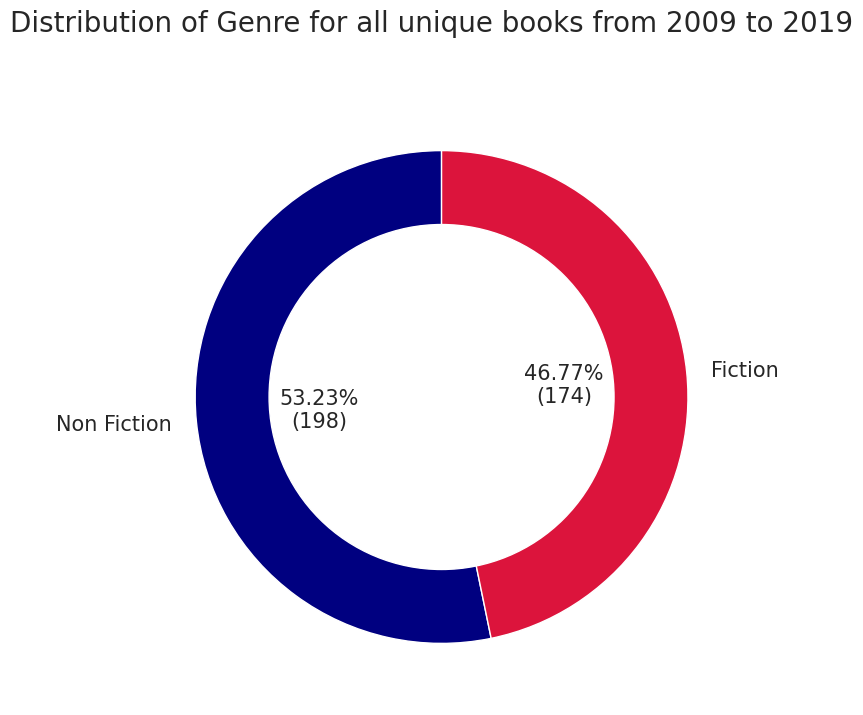

In [ ]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values),
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

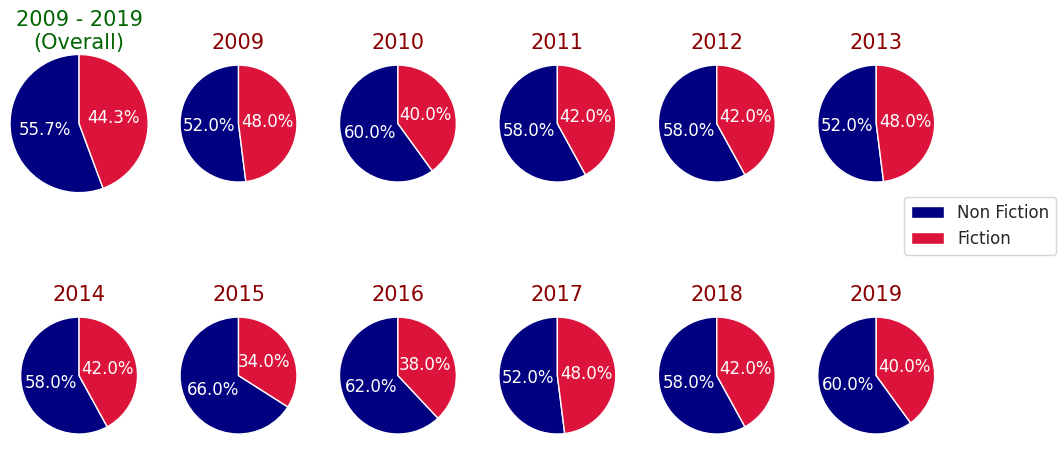

In [ ]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                  startangle=90, textprops={'size': 12,'color': 'white'},
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

#plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             #fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

/tmp/ipython-input-3566829097.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
/tmp/ipython-input-3566829097.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


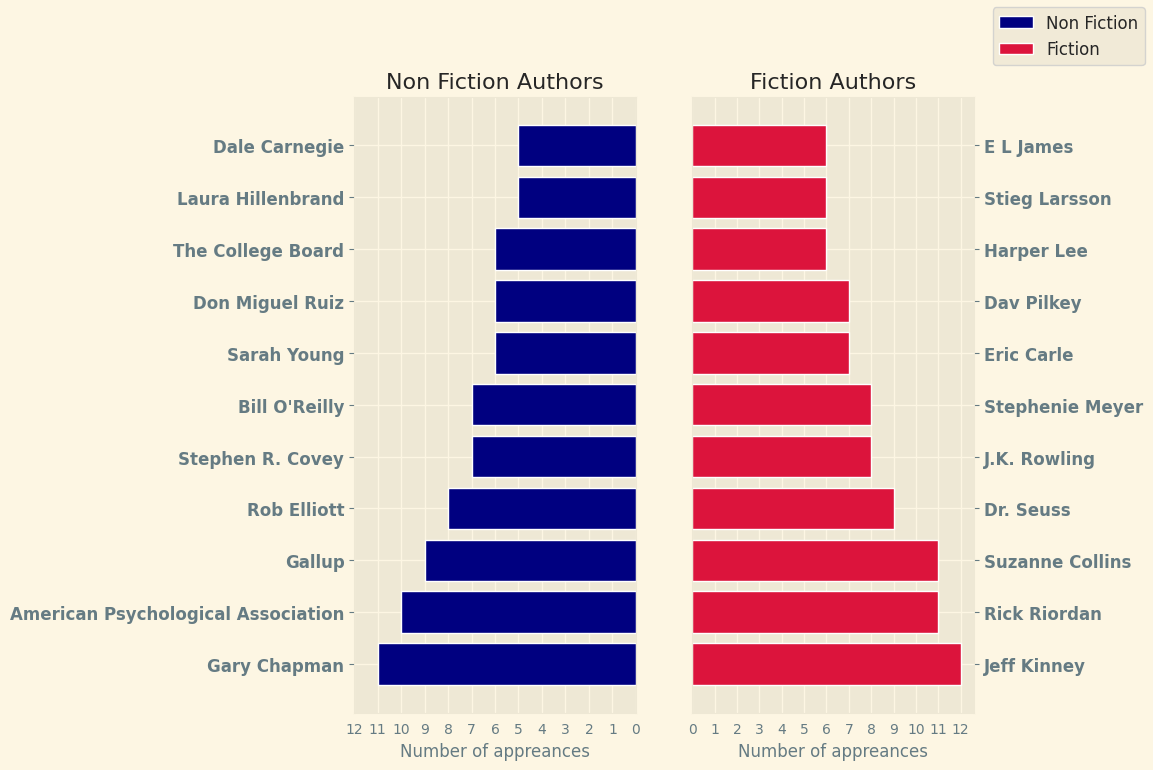

In [ ]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))

    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')

    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')

    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)

plt.show()

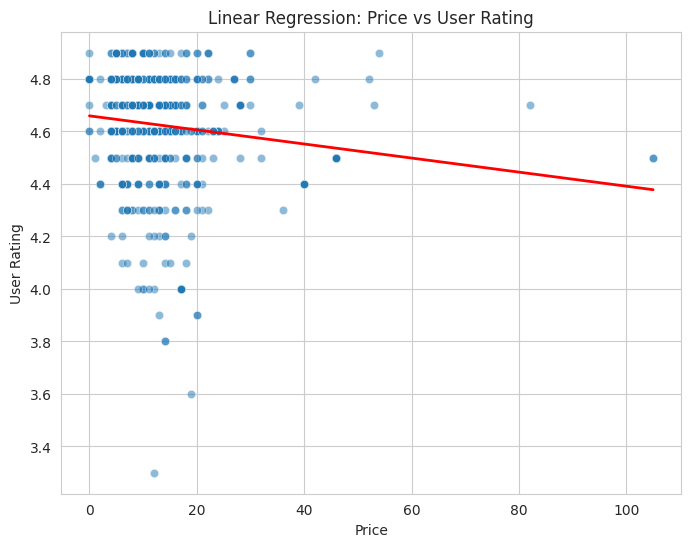

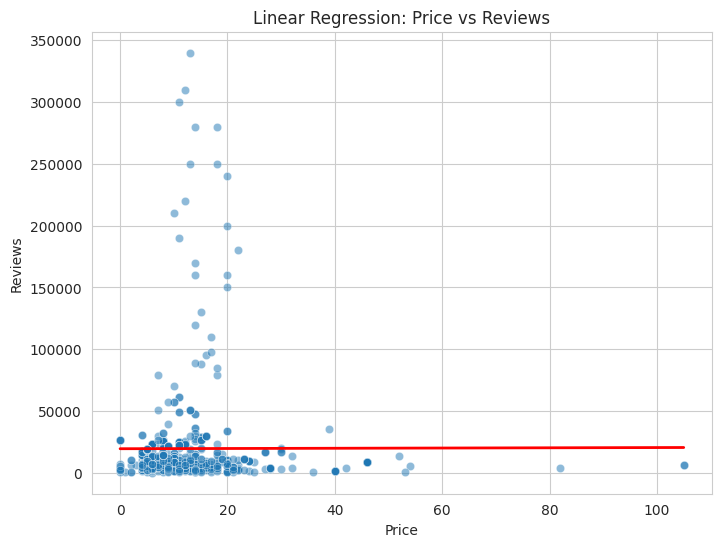

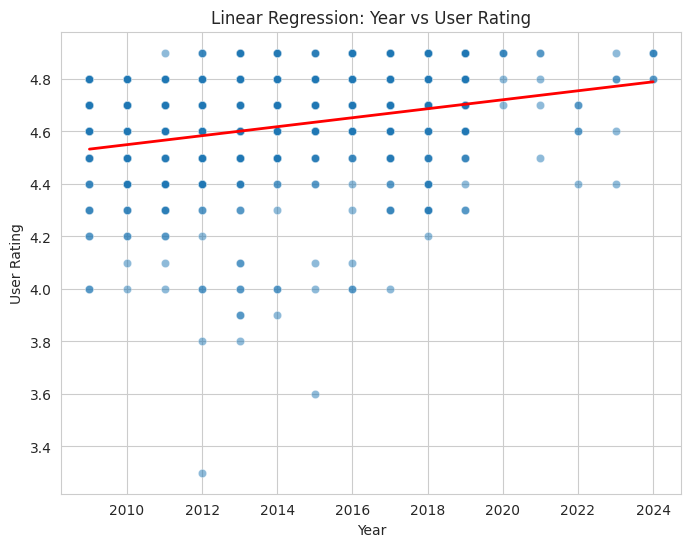

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load dataset (change the path if needed)
df = pd.read_csv("bestsellers_updated_2019_2024.csv")

# Define feature pairs for regression
feature_pairs = [
    ("Price", "User Rating"),
    ("Price", "Reviews"),
    ("Year", "User Rating"),
]

# Loop through each pair and create regression plots
for x_col, y_col in feature_pairs:
    X = df[[x_col]].values
    y = df[y_col].values

    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.5)
    plt.plot(x_range, y_pred, color="red", linewidth=2)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Linear Regression: {x_col} vs {y_col}")
    plt.show()


Dataset shape: (575, 7)
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


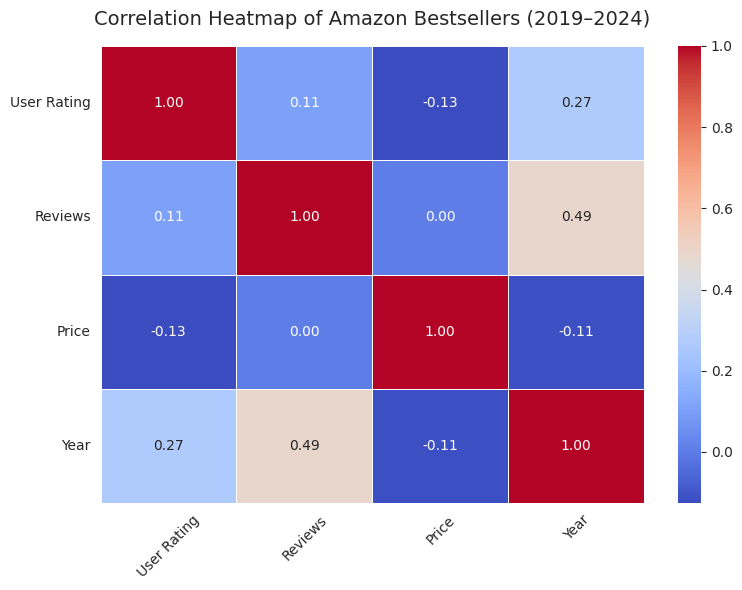

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset
df = pd.read_csv('bestsellers_updated_2019_2024.csv')

# Display basic info
print("Dataset shape:", df.shape)
print(df.head())

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Set up the figure
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Amazon Bestsellers (2019–2024)', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()



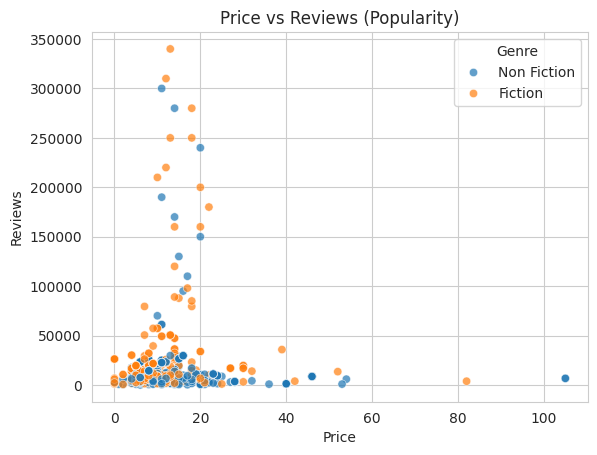

In [ ]:
sns.scatterplot(data=df, x='Price', y='Reviews', hue='Genre', alpha=0.7)
plt.title("Price vs Reviews (Popularity)")
plt.show()


🧩 6. Word Cloud of Book Titles

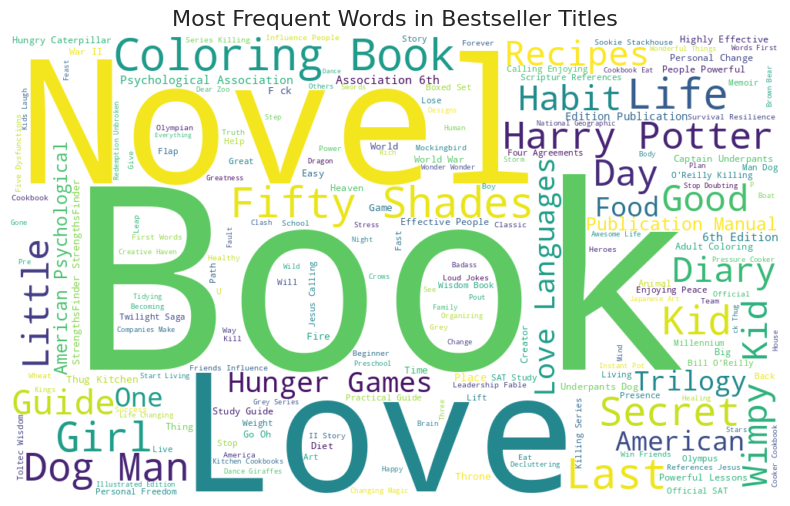

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['Name'])
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Bestseller Titles", fontsize=16)
plt.show()
